# MOVIE RATING PREDICTION WITH PYTHON

In [193]:
# Import all the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
# Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [195]:
df.shape

(15509, 10)

In [196]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [198]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Exploratory Data Analysis

In [199]:
# We will analyze the dataset like we will find patterns between different features, handling null values 
# and outliers and carrying out feature enginnering if needed. Basically, we will study the dataset entirely
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [200]:
# Remove the columns which dont have any impact on the target variable like Name and Year
df.drop(['Name', 'Year', 'Duration', 'Votes'], inplace=True, axis=1)

In [201]:
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,"Comedy, Romance",4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...
15504,Action,4.6,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,"Action, Drama",4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Action,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Action,NaN,NaN,NaN,NaN,NaN


In [202]:
# We have different genre grouped together so split the Genre column so that all the Genre values divide into single row
# This will increase the number of rows but it will provide a better understanding of the data and for further evaluation
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Drama,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,Musical,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
...,...,...,...,...,...,...
15505,Drama,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Action,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Action,NaN,NaN,NaN,NaN,NaN
15508,Action,6.2,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


#### Dealing with the missing values

In [203]:
# Finding the mode of the Genre column to replace the null values with the mode
Genre_mode = df['Genre'].mode()[0]
Genre_mode

'Drama'

In [204]:
df['Genre'].fillna(Genre_mode, inplace=True)
df.isnull().sum()

Genre          0
Rating      9113
Director     542
Actor 1     1783
Actor 2     2673
Actor 3     3525
dtype: int64

As we have exploded the Genre column many duplicate columns have developed so we have to remove these duplicate columns to make a fresh dataset with no duplicates

In [205]:
df.shape

(24950, 6)

In [206]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(24111, 6)

In [207]:
df.dropna(subset=df.columns[2:], how='all', inplace=True)
df['Director'].isnull().sum()

0

In [208]:
# Creating the meidans and modes to fill them inpace of null values
rating_median = df['Rating'].median()
actor1_mode = df['Actor 1'].mode()[0]
actor2_mode = df['Actor 2'].mode()[0]
actor3_mode = df['Actor 3'].mode()[0]
Director_mode = df['Director'].mode()[0]

In [209]:
# Handle the rest of the missing values
# Lot of missing values :) LOL
df['Rating'].fillna(rating_median, inplace=True)
df['Actor 1'].fillna(actor1_mode, inplace=True)
df['Actor 2'].fillna(actor2_mode, inplace=True)
df['Actor 3'].fillna(actor3_mode, inplace=True)
df['Director'].fillna(Director_mode, inplace=True)

In [210]:
df.isnull().sum()

Genre       0
Rating      0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [212]:
df.head()

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3
0,Drama,6.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Drama,6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,Musical,6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


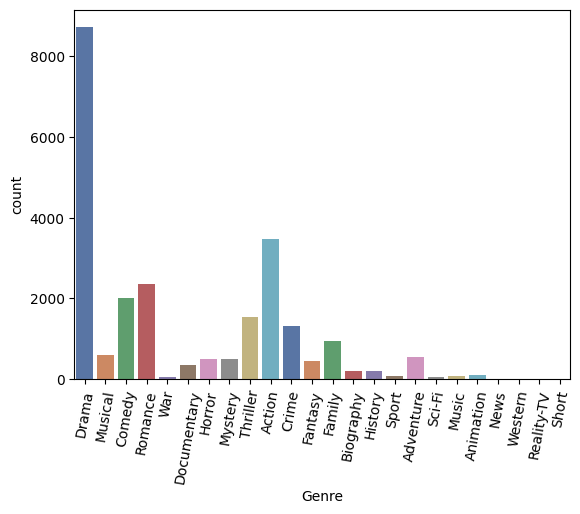

In [226]:
sns.countplot(df, x='Genre', hue='Genre', palette='deep')
plt.xticks(rotation = 80)
plt.show()

We have handled a lot of missing values. Now the dataset is ready to be trained on a machine learning model

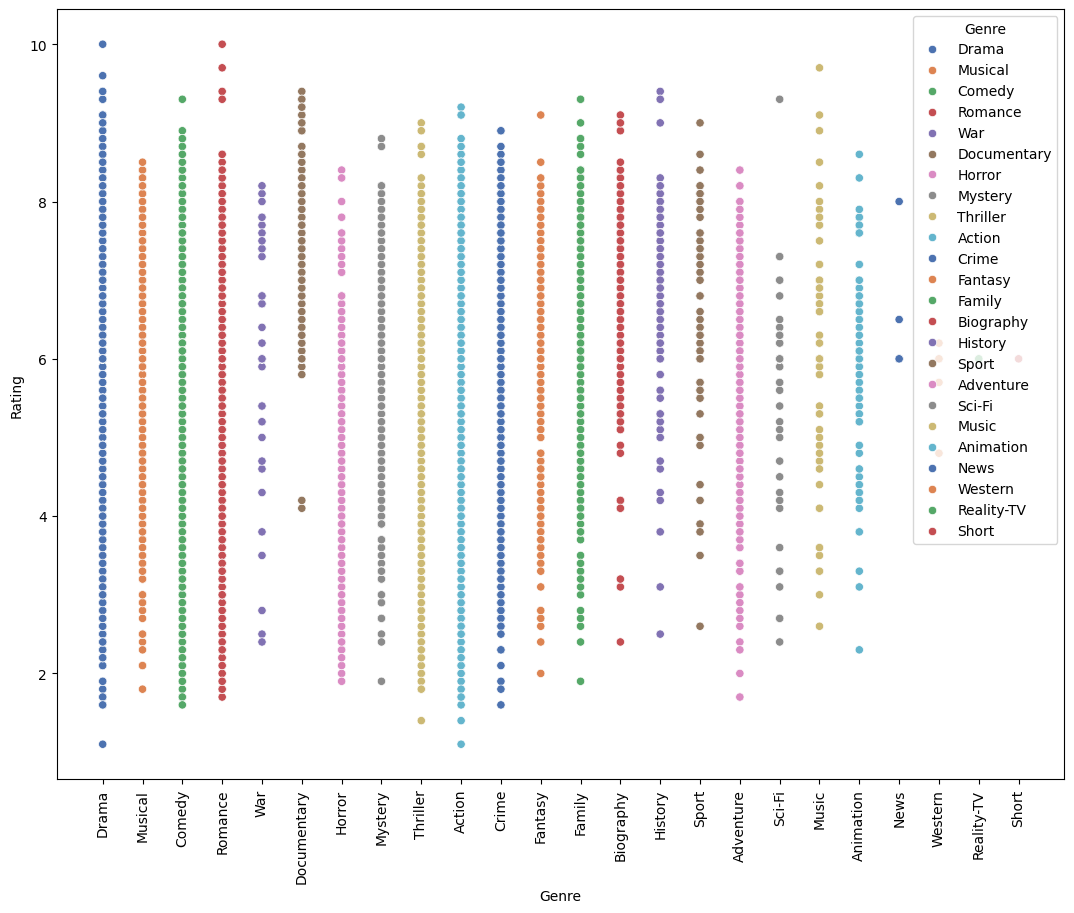

In [241]:
# scatterplot to see the replation between 
plt.figure(figsize=(13, 10))
sns.scatterplot(df, x='Genre', y='Rating', hue='Genre', palette='deep')
plt.xticks(rotation = 90)
plt.show()

## Feature Engineering

In [244]:
# Grouping the columns with their average rating and then creating a new feature
df['genre_avg_rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['director_avg_rating'] = df.groupby('Director')['Rating'].transform('mean')
df['actor1_avg_rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['actor2_avg_rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['actor3_avg_rating'] = df.groupby('Actor 3')['Rating'].transform('mean')

In [245]:
df

,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,gnr_avg_rating,dir_avg_rating,act1_avg_rating,act2_avg_rating,act3_avg_rating,genre_avg_rating,director_avg_rating,actor1_avg_rating,actor2_avg_rating,actor3_avg_rating
0,Drama,6.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,5.998898,5.850000,6.000000,5.661224,6.000000,5.998898,5.850000,6.000000,5.661224,6.000000
1,Drama,7.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,5.998898,7.000000,6.850000,7.000000,7.000000,5.998898,7.000000,6.850000,7.000000,7.000000
2,Drama,6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,5.998898,6.000000,6.400000,6.675000,6.000000,5.998898,6.000000,6.400000,6.675000,6.000000
2,Musical,6.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.132653,6.000000,6.400000,6.675000,6.000000,6.132653,6.000000,6.400000,6.675000,6.000000
3,Comedy,4.4,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.790015,4.400000,5.250000,4.400000,4.460000,5.790015,4.400000,5.250000,4.400000,4.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15505,Action,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.613863,5.175000,5.465919,4.613333,5.682292,5.613863,5.175000,5.465919,4.613333,5.682292
15505,Drama,4.5,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.998898,5.175000,5.465919,4.613333,5.682292,5.998898,5.175000,5.465919,4.613333,5.682292
15506,Action,6.0,Kiran Thej,Sangeeta Tiwari,Rekha,Pran,5.613863,6.000000,6.000000,6.072786,6.106045,5.613863,6.000000,6.000000,6.072786,6.106045
15508,Action,6.2,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,5.613863,4.223684,5.841581,5.558025,5.387500,5.613863,4.223684,5.841581,5.558025,5.387500


In [264]:
# importing train test split model 
from sklearn.model_selection import train_test_split
x = df[['genre_avg_rating', 'director_avg_rating', 'actor1_avg_rating', 'actor2_avg_rating', 'actor3_avg_rating']] # input variable
y = df['Rating'] # target variable

In [265]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [266]:
# importing the modules required
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

In [267]:
# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [268]:
# constructing the linear regression model and training it with the dataset
linear = LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)
linear_absolute_error = mean_absolute_error(y_test,y_pred)
linear_squared_error = mean_squared_error(y_test,y_pred)
linear_score = r2_score(y_test,y_pred)
print("Mean Absolute Error:", linear_absolute_error)
print("Mean Squared Error:", linear_squared_error)
print("R-squared:", linear_score)

Mean Absolute Error: 0.42147175186512786
Mean Squared Error: 0.36156013115949903
R-squared: 0.7025287771218064


In [269]:
# Decision Tree algorithm
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
dpred = decision_tree.predict(x_test)
decision_tree_absolute_error = mean_absolute_error(y_test,dpred)
decision_tree_squared_error = mean_squared_error(y_test,dpred)
decision_tree_score = r2_score(y_test,dpred)
print("Mean Absolute Error:", decision_tree_absolute_error)
print("Mean Squared Error:", decision_tree_squared_error)
print("R-squared:", decision_tree_score)

Mean Absolute Error: 0.2047829897144966
Mean Squared Error: 0.26692943514290546
R-squared: 0.7803855606548686


In [278]:
from sklearn.ensemble import RandomForestRegressor

In [279]:
# Random Forest algorithm
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
random_forest_mean_absolute_error = mean_absolute_error(y_test,y_pred)
random_forest_mean_squared_error = mean_squared_error(y_test,y_pred)
random_forest_r2_score = r2_score(y_test,y_pred)
print("Mean Absolute Error:", random_forest_mean_absolute_error)
print("Mean Squared Error:", random_forest_mean_squared_error)
print("R-squared:", random_forest_r2_score)

Mean Absolute Error: 0.21575634850751088
Mean Squared Error: 0.15593269567697168
R-squared: 0.8717073989298354


Overally, Random forest regressor gave us somewhat better results. So, we can say that in this case the random forest regressor best fits.

Actually, this dataset has many approaches in which we can deal this. It depends upon what are the requirements and how you want to get your data dealt with.

## APPROACh-2: We could have also dropped some other column based on our requirements and needs. We say that the rating column had a lot of missing values which we filled with median values, we could have dropped them too and that would have resulted in different result. 